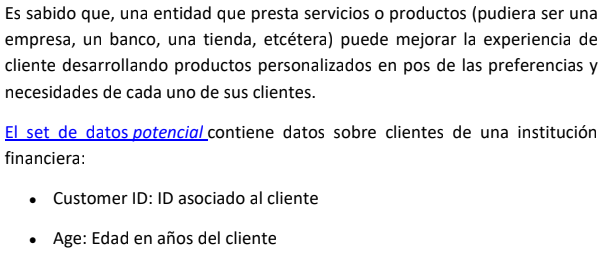

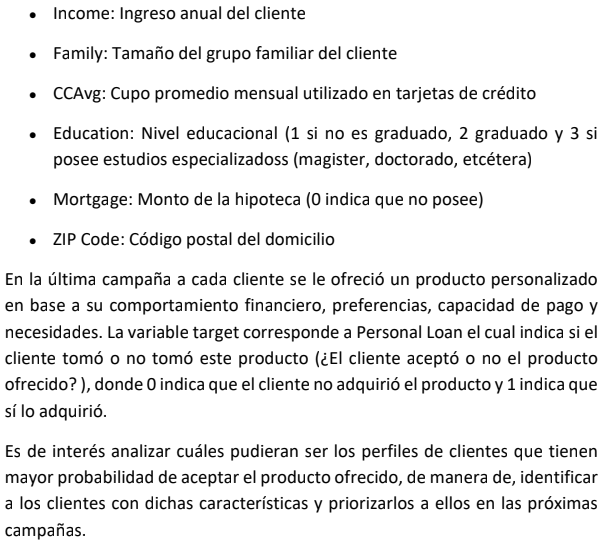

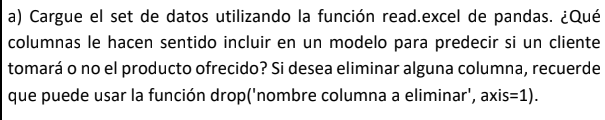

In [1]:
import pandas as pd
import seaborn as sns

In [2]:
# leer excel
df = pd.read_excel('potencial.xlsx', sheet_name='Data')

df

,ID,Age,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan
0,1,25,49,91107,4,1.6,1,0,0
1,2,45,34,90089,3,1.5,1,0,0
2,3,39,11,94720,1,1.0,1,0,0
3,4,35,100,94112,1,2.7,2,0,0
4,5,35,45,91330,4,1.0,2,0,0
...,...,...,...,...,...,...,...,...,...
4995,4996,29,40,92697,1,1.9,3,0,0
4996,4997,30,15,92037,4,0.4,1,85,0
4997,4998,63,24,93023,2,0.3,3,0,0
4998,4999,65,49,90034,3,0.5,2,0,0


In [3]:
df.describe()

,ID,Age,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,2500.500000,45.338400,73.774200,93152.503000,2.396400,1.937913,1.881000,56.498800,0.096000
std,1443.520003,11.463166,46.033729,2121.852197,1.147663,1.747666,0.839869,101.713802,0.294621
min,1.000000,23.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000
25%,1250.750000,35.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000
50%,2500.500000,45.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000
75%,3750.250000,55.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000
max,5000.000000,67.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000


In [4]:
df.corr()

,ID,Age,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan
ID,1.000000,-0.008473,-0.017695,0.013432,-0.016797,-0.024672,0.021463,-0.013920,-0.024801
Age,-0.008473,1.000000,-0.055269,-0.029216,-0.046418,-0.052030,0.041334,-0.012539,-0.007726
Income,-0.017695,-0.055269,1.000000,-0.016410,-0.157501,0.645993,-0.187524,0.206806,0.502462
ZIP Code,0.013432,-0.029216,-0.016410,1.000000,0.011778,-0.004068,-0.017377,0.007383,0.000107
Family,-0.016797,-0.046418,-0.157501,0.011778,1.000000,-0.109285,0.064929,-0.020445,0.061367
CCAvg,-0.024672,-0.052030,0.645993,-0.004068,-0.109285,1.000000,-0.136138,0.109909,0.366891
Education,0.021463,0.041334,-0.187524,-0.017377,0.064929,-0.136138,1.000000,-0.033327,0.136722
Mortgage,-0.013920,-0.012539,0.206806,0.007383,-0.020445,0.109909,-0.033327,1.000000,0.142095
Personal Loan,-0.024801,-0.007726,0.502462,0.000107,0.061367,0.366891,0.136722,0.142095,1.000000


<Axes: >

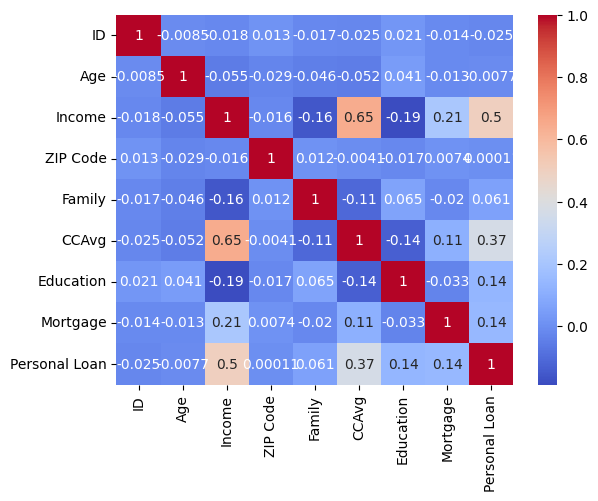

In [5]:
# Calcular la matriz de correlación
correlation_matrix = df.corr()

# Crear el mapa de calor
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

In [6]:
# Seleccionar las columnas que se van a usar para el modelo
df = df[['Age', 'Income', 'Family', 'CCAvg', 'Education', 'Mortgage', 'Personal Loan']]

df

,Age,Income,Family,CCAvg,Education,Mortgage,Personal Loan
0,25,49,4,1.6,1,0,0
1,45,34,3,1.5,1,0,0
2,39,11,1,1.0,1,0,0
3,35,100,1,2.7,2,0,0
4,35,45,4,1.0,2,0,0
...,...,...,...,...,...,...,...
4995,29,40,1,1.9,3,0,0
4996,30,15,4,0.4,1,85,0
4997,63,24,2,0.3,3,0,0
4998,65,49,3,0.5,2,0,0


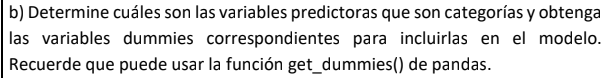

In [7]:
# Castear Education a categorico
df['Education'] = df['Education'].astype('category')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Age            5000 non-null   int64   
 1   Income         5000 non-null   int64   
 2   Family         5000 non-null   int64   
 3   CCAvg          5000 non-null   float64 
 4   Education      5000 non-null   category
 5   Mortgage       5000 non-null   int64   
 6   Personal Loan  5000 non-null   int64   
dtypes: category(1), float64(1), int64(5)
memory usage: 239.5 KB


C:\Users\diego\AppData\Local\Temp\ipykernel_26212\3221556961.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Education'] = df['Education'].astype('category')


In [8]:
# hacer get dummies de Education
df = pd.get_dummies(df, columns=['Education','Family'])

df

,Age,Income,CCAvg,Mortgage,Personal Loan,Education_1,Education_2,Education_3,Family_1,Family_2,Family_3,Family_4
0,25,49,1.6,0,0,1,0,0,0,0,0,1
1,45,34,1.5,0,0,1,0,0,0,0,1,0
2,39,11,1.0,0,0,1,0,0,1,0,0,0
3,35,100,2.7,0,0,0,1,0,1,0,0,0
4,35,45,1.0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,29,40,1.9,0,0,0,0,1,1,0,0,0
4996,30,15,0.4,85,0,1,0,0,0,0,0,1
4997,63,24,0.3,0,0,0,0,1,0,1,0,0
4998,65,49,0.5,0,0,0,1,0,0,0,1,0


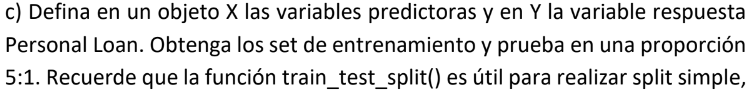

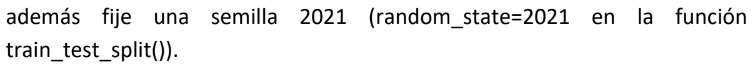

In [9]:
X = df.drop('Personal Loan', axis=1)
y = df['Personal Loan']

In [10]:
# generar datos de test con el 1/6 de los datos
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=(1/6), random_state=2021)

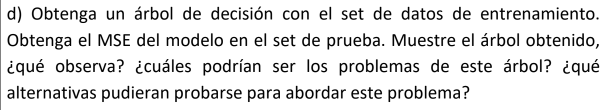

In [11]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
import matplotlib.pyplot as plt

In [12]:
# generar treedecision
arbol = DecisionTreeClassifier(random_state=2021)

In [13]:
# Entrenar el modelo
arbol.fit(X_train, y_train)

DecisionTreeClassifier(random_state=2021)

In [14]:
# Calcular MSE y Accuracy

y_pred = arbol.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("MSE del modelo:", mse)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy del modelo: {accuracy}")


MSE del modelo: 0.015587529976019185
Accuracy del modelo: 0.9844124700239808


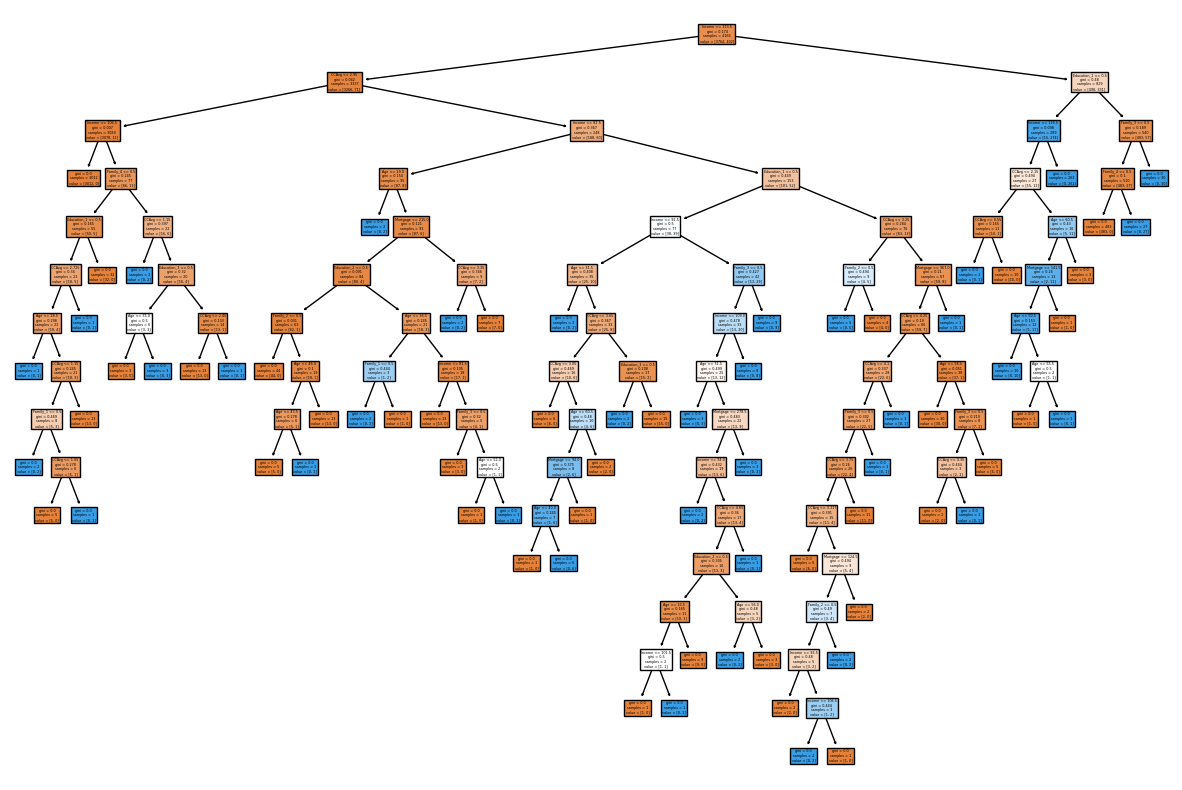

In [15]:
fig = plt.figure(figsize=(15, 10))
_ = plot_tree(arbol, feature_names=X.columns, filled=True)
plt.show()

In [16]:
#obtener profundidad del arbol
arbol.get_depth()

15

In [17]:
# Observando el arbol de decision, se puede ver que el modelo obtiene metricas muy buenas. Pero al ver el gráfico del arbol,
# se observa que presenta una profundidad de 15, lo que significa que el modelo esta memorizando los datos de entrenamiento generando
# asi overfitting. Por lo que se debe realizar una poda al arbol para evitar este sobreajuste.

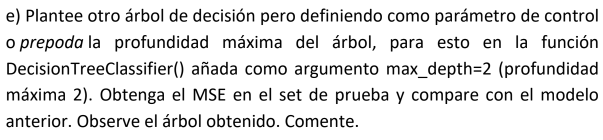

In [18]:
arbol2 = DecisionTreeClassifier(random_state=2021, max_depth=2)
arbol2.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=2021)

In [19]:
# Calcular el MSE y Accuaracy del modelo

y_pred = arbol2.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("MSE del modelo:", mse)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy del modelo: {accuracy}")

MSE del modelo: 0.03237410071942446
Accuracy del modelo: 0.9676258992805755


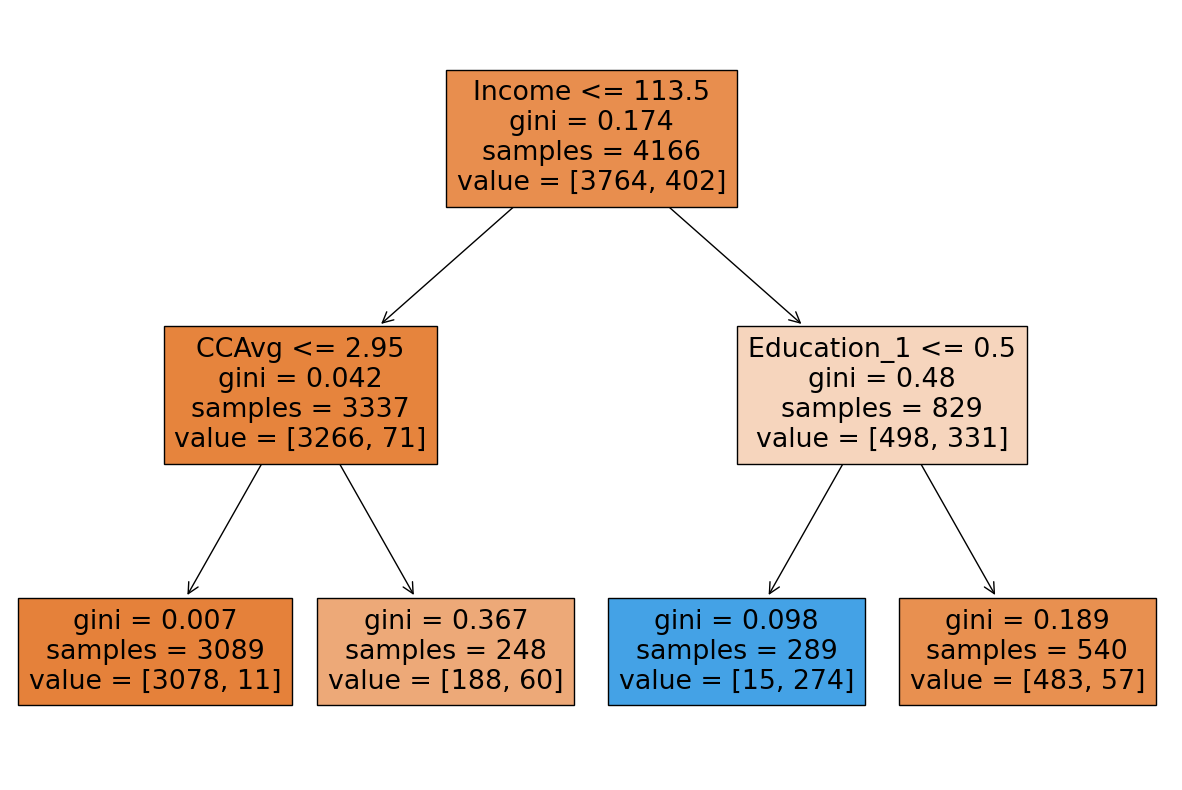

In [20]:
fig = plt.figure(figsize=(15, 10))
_ = plot_tree(arbol2, feature_names=X.columns, filled=True)
plt.show()

In [21]:
# Como se puede ver en el accuracy del modelo, este disminuyo un poco al podar el modelo, pero se puede ver que el arbol
# es mucho mas simple y no ya presentaría overfitting. Por lo que se puede decir que el modelo es mejor al podar el arbol.
# Ya que está mas generalizado para ser usado con nuevos set de datos. Además su accuracy es sigue siendo muy bueno con un 0.9676.

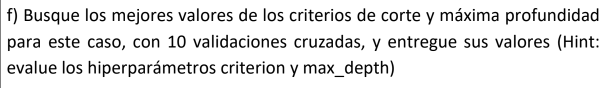

In [22]:
from sklearn.model_selection import GridSearchCV

In [23]:
# Definir los parametros a probar
parametros = {'criterion': ['gini', 'entropy'],
                'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10]}

# Definir el modelo nuevo
arbol3 = DecisionTreeClassifier(random_state=2021)

In [24]:
# Definir gridsearch con parametros
grilla = GridSearchCV(arbol3, parametros, cv=10)

# Entrenar el modelo
grilla.fit(X_train, y_train)

{'criterion': 'entropy', 'max_depth': 10}

In [28]:
# Obtener los mejores parametros
grilla.best_params_

print(F"Los mejores parametros son: {grilla.best_params_}")

Los mejores parametros son: {'criterion': 'entropy', 'max_depth': 10}


In [25]:
# Entrenar el modelo con los mejores parametros
grilla.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=2021),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10]})

In [26]:
# Calcular el MSE y Accuaracy del modelo

y_pred = grilla.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("MSE del modelo:", mse)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy del modelo: {accuracy}")

MSE del modelo: 0.015587529976019185
Accuracy del modelo: 0.9844124700239808


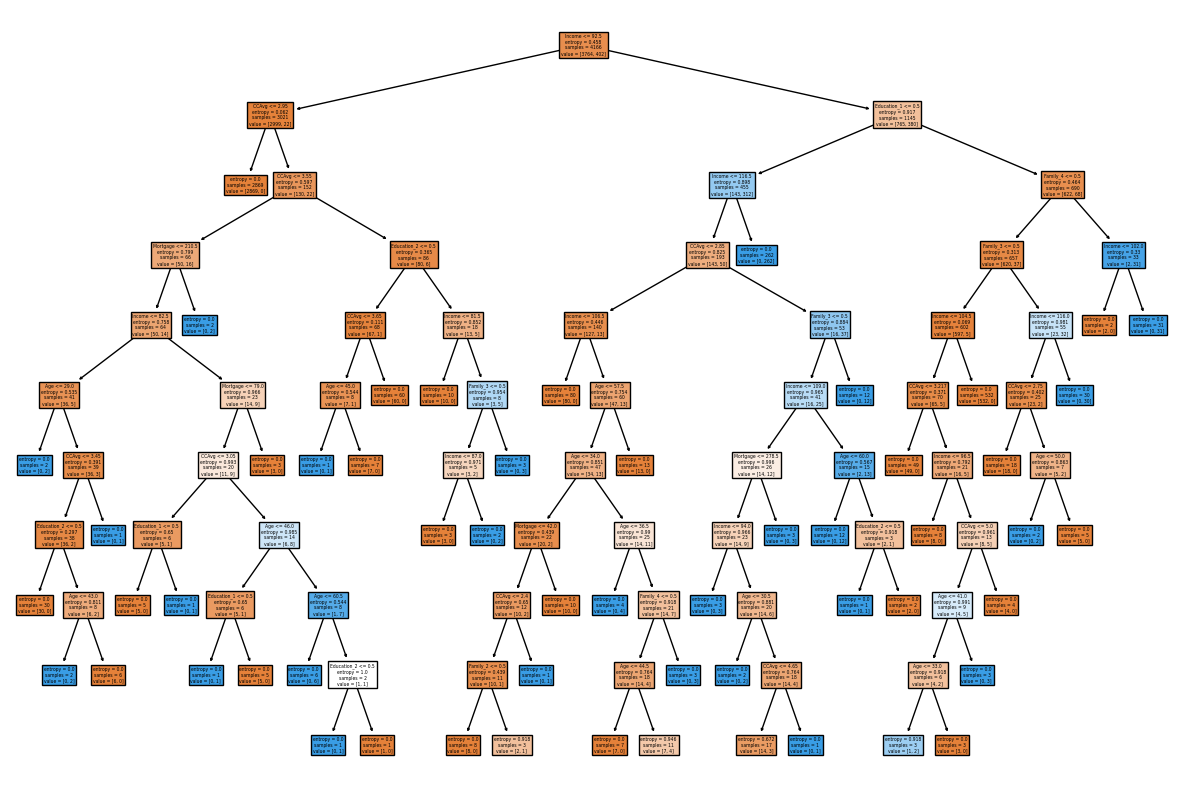

In [27]:
# graficar el arbol
fig = plt.figure(figsize=(15, 10))
_ = plot_tree(grilla.best_estimator_, feature_names=X.columns, filled=True)
plt.show()